# Estatísticas descritivas e Visualização de Dados
Este notebook é responsável por mostrar as estatíscas descritivas da base dados com visualizações.
Será analisado o comportamento de algumas características que são cruciais na compra/venda de veículos usados.

In [1]:
from Utils import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', 100)
DATASET = "../datasets/clean_vehicles_2.csv"
df = pd.read_csv(DATASET)

df.describe()

,price,year,odometer,lat,long
count,3.969010e+05,396901.000000,3.969010e+05,396901.000000,396901.000000
mean,3.432897e+04,2010.258528,9.345143e+04,38.514338,-94.976967
std,6.346648e+06,8.667275,1.106876e+05,5.920743,18.126894
min,0.000000e+00,1900.000000,-1.000000e+00,-83.197100,-177.012000
25%,4.999000e+03,2007.000000,3.994600e+04,34.549400,-111.925000
50%,1.049500e+04,2012.000000,8.700000e+04,38.996600,-89.448400
75%,1.799900e+04,2016.000000,1.320000e+05,42.512500,-81.324400
max,2.490531e+09,2021.000000,1.000000e+07,78.473300,139.388000


## Estatísticas Univariadas
Aqui vamos análisar o comportamento de alguns dados em relação a sua distribuição.
### Ano de fabricação



In [19]:
##Análise de média, desvio padrão, mediana e moda do Ano de fabricação
print(
"Ano do veículo:\n"
"Média: "+floatStr(df['year'].mean())+"\n"+
"Desvio padrão: "+floatStr(df['year'].std())+"\n"+   
"Mediana: "+floatStr(df['year'].median())+"\n"+
"IQR: "+floatStr(df['year'].describe()[6] - df['year'].describe()[4])+"\n"+
"Moda: "+floatStr(df['year'].mode().loc[0])    
)

Ano do veículo:
Média: 2010.26
Desvio padrão: 8.67
Mediana: 2012.0
IQR: 9.0
Moda: 2017.0


Aqui notamos uma mediana maior do que a média. O que nos levar a imaginar que esta grandeza não segue uma distribuição normal.
Isto indica que deve haver alguns carros muito antigos sendo vendidos, gerando uma caractéristica de assimetria na curva.


Para verifcarmos isso, vamos gerar o histograma

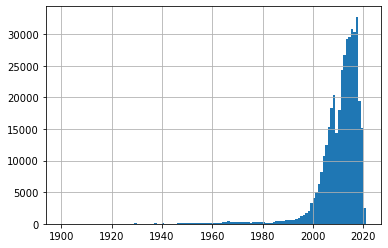

In [4]:
##Plotar o histograma da distribuição em relação ao ano de fabricação do veículo
bars = df[df['year']> 0].year.max() - df[df['year']> 0].year.min()
df[df['year']> 0].year.hist(bins = int(bars))

Porém, este plotting não nos dá uma boa visualização. Nesta lista há alguns carros voltados para colecionadores, que não é o perfil que queremos estudar. 
Então, tomando o ano de 1985 como limiar, analisamos o histograma da distribuição de carros comercializáveis "para uso normal".

Agora conseguimos perceber que a maior parte dos carros vendidos são fábricados depois de 2000. 

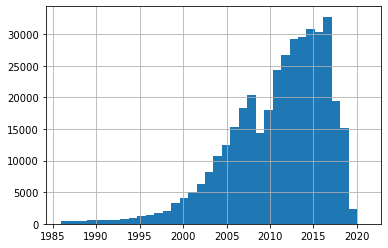

In [5]:
##Plot do histograma dos anos de fabricação do carro limitando à 1985
bars = df['year'].max() - 1985
df[df['year']> 1985].year.hist(bins = int(bars))


### Preço de revenda do veículo

In [20]:
##Análise de estatísticas univariadas dos valores de preço do veículo
print(
"Preço do veículo:\n"
"Média: "+floatStr(df[df['price'] > 0].price.mean())+"\n"+
"Desvio padrão: "+floatStr(df[df['price'] > 0].price.std())+"\n"+   
"Mediana: "+floatStr(df[df['price'] > 0].price.median())+"\n"+
"IQR: "+floatStr(df['price'].describe()[6] - df['price'].describe()[4])+"\n"+
"Moda: "+floatStr(df[df['price'] > 0].price.mode().loc[0])    
)

Preço do veículo:
Média: 36809.65
Desvio padrão: 6571953.45
Mediana: 11495.0
IQR: 13000.0
Moda: 7995


Aqui encontramos uma diferença muito grandes nestes dados. O que nos faz pensar que temos uma distribuição muito variada e assimétrica de preços.


Devido a esta característica, não conseguiremos ver um histograma com todos os dados. Podemos contornar isto de 2 maneiras:

   * Poderíamos usar o log10 para ter uma noção da ordem de grandeza, mas não conseguiríamos extrair muita informação, pois a maioria se encaixariam em log10(x) = 4.
   * Outra alternativa seria plotar um subconjunto dos preços. 
Então, depois de algumas análises, protaremos apenas valores de 0 a $ 100.000.


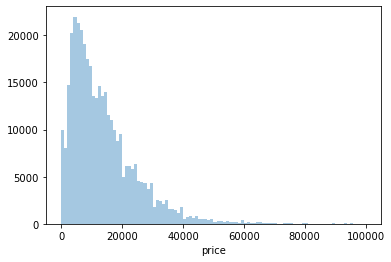

In [7]:
sns.distplot(df[(df['price'] > 0) & (df['price'] < 100000)].price, bins = 100,norm_hist = False, hist=True, kde=False)

### Leitura atual do Odômetro (Milhas percorrida pelo veículo)

In [21]:
##Análise de estatísticas univariadas dos valores de leitura do Odômetro.
##Note que estamos descartando valores nulos para fazer esta análise
print(
"Odômetro do veículo:\n"
"Média: "+floatStr(df[df['odometer'] > 0].odometer.mean())+"\n"+
"Desvio padrão: "+floatStr(df[df['odometer'] > 0].odometer.std())+"\n"+   
"Mediana: "+floatStr(df[df['odometer'] > 0].odometer.median())+"\n"+
"IQR: "+floatStr(df['odometer'].describe()[6] - df['odometer'].describe()[4])+"\n"+
"Moda: "+floatStr(df[df['odometer'] > 0].odometer.mode().loc[0])    
)

Odômetro do veículo:
Média: 99705.09
Desvio padrão: 111570.94
Mediana: 92200.0
IQR: 92054.0
Moda: 150000.0


Aqui também temos uma grande varidade de valores. Apenas 492 deles estão acima de 800.000 de milhas registradas. Para fim de análise, iremos utilizar este intervalo.


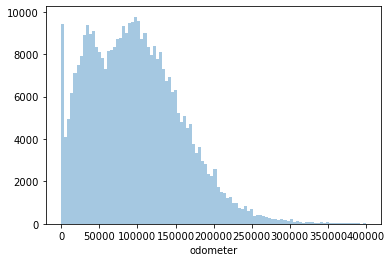

In [9]:
sns.distplot(df[(df['odometer'] > 0) & (df['odometer'] < 400000)].odometer, bins = 100,norm_hist = False, hist=True, kde=False)

### Visualização de quantidade de anúncios por fabricantes de veículos
Faremos uma análise visual para tentar perceber quais as marcas mais populares no mercado de seminovos.

As 3 marcas mais anunciadas (Ford, chevrolet, toyota) equivalem a 40.15% deste mercado.


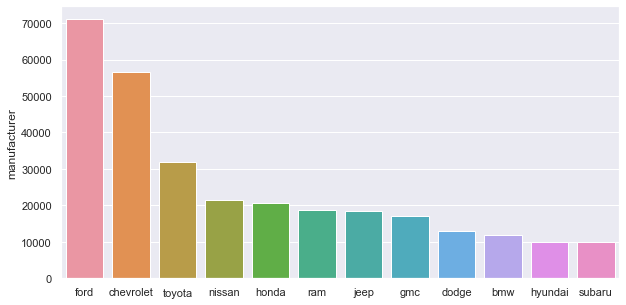

In [10]:
## Plotar a divisão de mercas que são mais anunciadas
manufacturers = df['manufacturer'].value_counts().drop(df['manufacturer'].value_counts().index[8]).drop(df['manufacturer'].value_counts().index[13:])
sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x=manufacturers.index, y=manufacturers)
print("As 3 marcas mais anunciadas (Ford, chevrolet, toyota) equivalem a "
      +str(round(sum(df['manufacturer'].value_counts().values[0:3])/df['manufacturer'].count()*100,2))
      +"% deste mercado.")


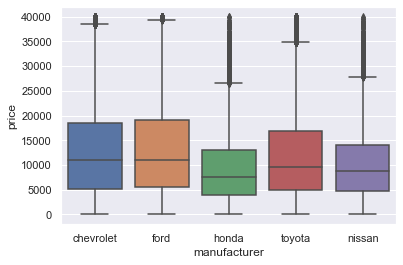

In [11]:
filter_list = ['ford', 'chevrolet', 'toyota', 'nissan', 'honda']
filtereddf = df[df.manufacturer.isin(filter_list)]

ax = sns.boxplot(x="manufacturer", y="price", data= filtereddf[filtereddf['price']< 40000])

### Visualização da relação entre preço de carros classificados por tração

Aqui podemos comparar como o preço variam de acordo com a tração do veículo 


   * 4wd: 4x4
   * rwd: tração traseira 
   * fwd: tração dianteira
    
    
Comparamos a média, mediana e quantidade. Porém, já percebemos de análises anteriores que a mediana nos dá um valor mais razoável, por isto ordenamos baseado nela


In [12]:
df[df['drive'] != 'undefined'].groupby(['drive']).agg(['mean','median','count'])['price'].sort_values(by='median', ascending=False)

,mean,median,count
drive,,,
4wd,27758.986715,14500,142645
rwd,80578.937604,10999,59972
fwd,32156.297215,7800,111115


## Estatísticas Bivariadas
Aqui vamos tentar encontrar se as grandezas numéricas possuem algum tipo de correlação. Primeiro analisaremos o método de spearman, depois de pearson. Em seguida tentaremos utilizar 

In [14]:
##Aplicando-se alguns limitadores para analisar correlações entre as variáveis
car = df[(df['odometer']> 0) & (df['odometer']<400000)]
car = car[(car['price']>0) & (car['price']<100000)]
car = car[car['year']>=1985]
car = car.drop(['lat','long'], axis=1)
car.cov()

,price,year,odometer
price,1.214600e+08,31611.026076,-3.076323e+08
year,3.161103e+04,32.636585,-1.969753e+05
odometer,-3.076323e+08,-196975.274233,3.616619e+09


In [15]:
car.corr(method='spearman')

,price,year,odometer
price,1.000000,0.629117,-0.532806
year,0.629117,1.000000,-0.669840
odometer,-0.532806,-0.669840,1.000000


In [16]:
car.corr(method='pearson')

,price,year,odometer
price,1.000000,0.502076,-0.464156
year,0.502076,1.000000,-0.573334
odometer,-0.464156,-0.573334,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


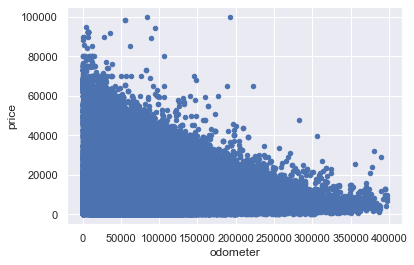

In [17]:
##Relaçãoo de preço x milhas rodadas entre as 3 marcas mais populares
filter_list = ['ford', 'chevrolet', 'toyota']
car[car['manufacturer'].isin(filter_list)].plot.scatter(x='odometer',y='price')

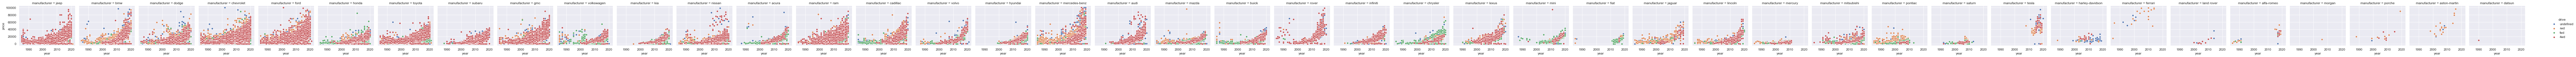

In [18]:
g = sns.FacetGrid(car[car['manufacturer']!='undefined'], col="manufacturer", hue='drive')
g.map(sns.scatterplot, "year", "price")
g.add_legend()

#Clique na imagem pequena para expandir